In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
r1= pd.read_csv('respondent_category_f.csv', sep=',', encoding='latin-1')

In [6]:
def rename_value(df, col_name, values):
    col = df[col_name]
    col_renamed = []
    for v in col:
        col_renamed.append(values.get(v))
    return col_renamed

In [8]:
r1 = r1[['school', 'category', 'frequency']]
r1.head()

,school,category,frequency
0,1. Ecole Mixte Bethesda,0. Paran,47
1,1. Ecole Mixte Bethesda,1. Elèv,46
2,1. Ecole Mixte Bethesda,2. Pwofesè,3
3,1. Ecole Mixte Bethesda,4. Direktè,1
4,2. Ecole Louis Maccen,0. Paran,38


In [9]:
respondents = {'0. Paran': 'parent', '1. Elèv': 'student', '2. Pwofesè': 'teacher', '4. Direktè': 'principal'}
l1 = rename_value(r1, 'category', respondents)
l1 = rename_value(r1, 'category', respondents)
r1['category'] = l1

In [10]:
schools = {'1. Ecole Mixte Bethesda': 'Ecole Mixte Bethesda',\
               '2. Ecole Louis Maccen': 'Ecole Louis Maccen',\
               '3. Frans Béda Académie': 'Frans Béda Académie',\
               '4. Institution Mixte Bethleem': 'Institution Mixte Bethleem',
               '5. Institution Mixte Espoir': 'Institution Mixte Espoir',
               '6. Institution Mixte Alma Mater': 'Institution Mixte Alma Mater',
               '7. Collègue Mixte Toussaint Louverture': 'Collègue Mixte Toussaint Louverture',
               '8. Liberty Collège Mixte': 'Liberty Collège Mixte'
               
          }
l = rename_value(r1, 'school', schools)

In [12]:
r1['school'] = l

In [13]:
r1.head()

,school,category,frequency
0,Ecole Mixte Bethesda,parent,47
1,Ecole Mixte Bethesda,student,46
2,Ecole Mixte Bethesda,teacher,3
3,Ecole Mixte Bethesda,principal,1
4,Ecole Louis Maccen,parent,38


In [14]:
r2 = r1.set_index(['school', 'category'])

In [15]:
r2

frequency
school                              category            
Ecole Mixte Bethesda                parent            47
                                    student           46
                                    teacher            3
                                    principal          1
Ecole Louis Maccen                  parent            38
                                    student           37
                                    teacher            0
                                    principal          1
Frans Béda Académie                 parent            15
                                    student           11
                                    teacher            0
                                    principal          0
Institution Mixte Bethleem          parent            43
                                    student           41
                                    teacher            8
                                    principal          0
Institution Mixte Espoir            parent            24
                                    student           30
                                    teacher            2
                                    principal          1
Institution Mixte Alma Mater        parent            76
                                    student           83
                                    teacher            8
                                    principal          1
Collègue Mixte Toussaint Louverture parent            83
                                    student           87
                                    teacher           11
                                    principal          1
Liberty Collège Mixte               parent            41
                                    student           34
                                    teacher            3
                                    principal          1

In [16]:
is_parent = r1['category'] == 'parent'

In [17]:
is_parent

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28     True
29    False
30    False
31    False
Name: category, dtype: bool

In [20]:
parents = r1[is_parent][['category', 'frequency']]

In [21]:
parents

,category,frequency
0,parent,47
4,parent,38
8,parent,15
12,parent,43
16,parent,24
20,parent,76
24,parent,83
28,parent,41


In [26]:
students = r1[r1['category'] == 'student'][['category', 'frequency']]
students

,category,frequency
1,student,46
5,student,37
9,student,11
13,student,41
17,student,30
21,student,83
25,student,87
29,student,34


In [24]:
teachers = r1[r1['category'] == 'teacher'][['category', 'frequency']]
teachers

,category,frequency
2,teacher,3
6,teacher,0
10,teacher,0
14,teacher,8
18,teacher,2
22,teacher,8
26,teacher,11
30,teacher,3


In [25]:
principals = r1[r1['category'] == 'principal'][['category', 'frequency']]
principals 

,category,frequency
3,principal,1
7,principal,1
11,principal,0
15,principal,0
19,principal,1
23,principal,1
27,principal,1
31,principal,1


In [32]:
r2

frequency
school                              category            
Ecole Mixte Bethesda                parent            47
                                    student           46
                                    teacher            3
                                    principal          1
Ecole Louis Maccen                  parent            38
                                    student           37
                                    teacher            0
                                    principal          1
Frans Béda Académie                 parent            15
                                    student           11
                                    teacher            0
                                    principal          0
Institution Mixte Bethleem          parent            43
                                    student           41
                                    teacher            8
                                    principal          0
Institution Mixte Espoir            parent            24
                                    student           30
                                    teacher            2
                                    principal          1
Institution Mixte Alma Mater        parent            76
                                    student           83
                                    teacher            8
                                    principal          1
Collègue Mixte Toussaint Louverture parent            83
                                    student           87
                                    teacher           11
                                    principal          1
Liberty Collège Mixte               parent            41
                                    student           34
                                    teacher            3
                                    principal          1

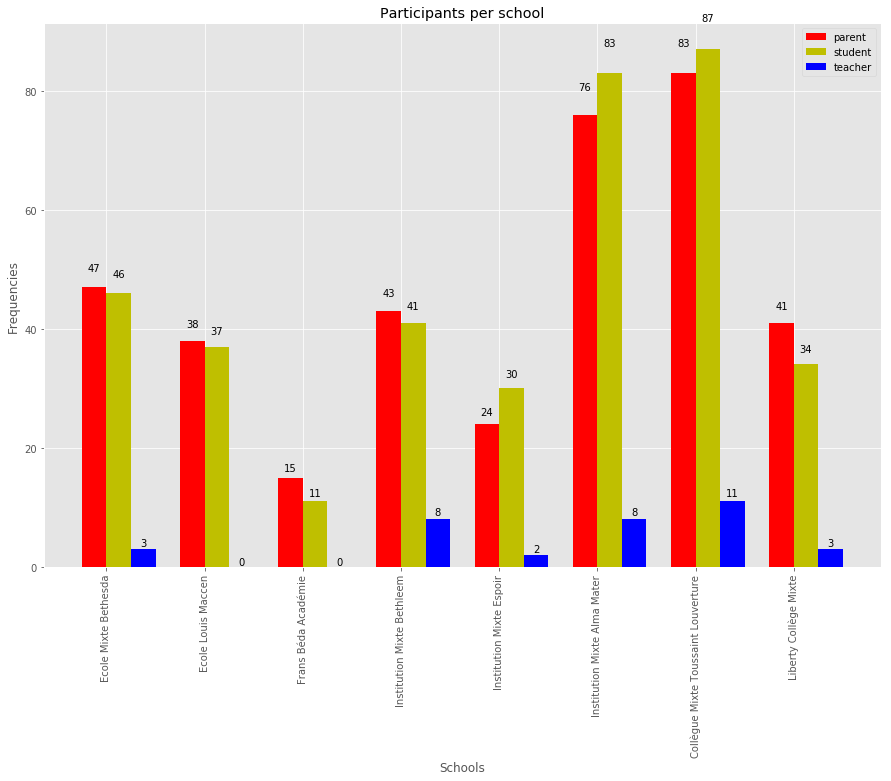

In [113]:
plt.style.use('ggplot')
#fig, ax = plt.subplots(figsize=(8, 5))
#plt.legend(['parent', 'pupil', 'teacher', 'principal'])
#plt.xticks(rotation=60)
N = 8
parents_ = list(parents['frequency'])
students_ = list(students['frequency'])
teachers_ = list(teachers['frequency'])
#principals_ = list(principals['frequency'])

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))

rects_p = ax.bar(ind, parents_, width, color='r')
rects_s = ax.bar(ind + width, students_, width, color='y')
rects_t = ax.bar(ind + 2 * width, teachers_, width, color='b')
#rects_pr = ax.bar(ind + 3 * width, principals_, width, color='c')

ax.set_ylabel('Frequencies')
ax.set_xlabel('Schools')
ax.set_title('Participants per school')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Ecole Mixte Bethesda',\
                         'Ecole Louis Maccen',\
                         'Frans Béda Académie',\
                         'Institution Mixte Bethleem',\
                         'Institution Mixte Espoir',\
                         'Institution Mixte Alma Mater',\
                         'Collègue Mixte Toussaint Louverture',\
                         'Liberty Collège Mixte'), rotation = 90)

ax.legend((rects_p[0], rects_s[0], rects_t[0]), ('parent', 'student', 'teacher'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects_p)
autolabel(rects_s)
#autolabel(rects_pr)
autolabel(rects_t)

#plt.show()


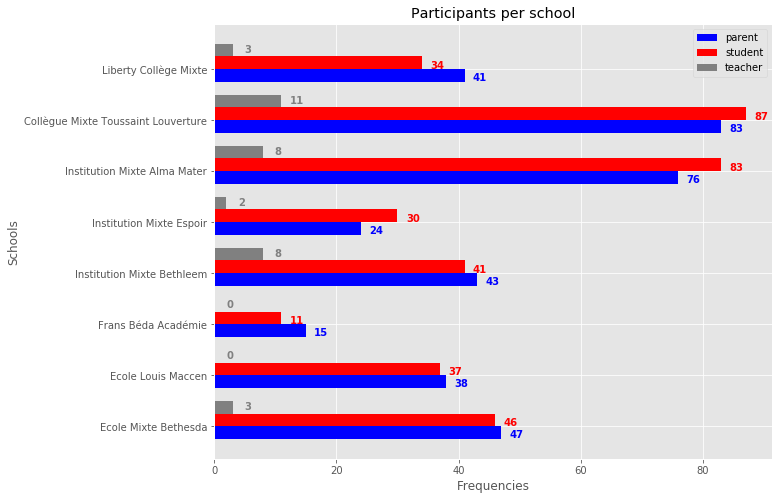

In [116]:
#plt.style.use('ggplot')
#fig, ax = plt.subplots(figsize=(8, 5))
#plt.legend(['parent', 'pupil', 'teacher', 'principal'])
#plt.xticks(rotation=60)
N = 8
parents_ = list(parents['frequency'])
students_ = list(students['frequency'])
teachers_ = list(teachers['frequency'])
#principals_ = list(principals['frequency'])

ind = np.arange(N)  # the x locations for the groups
width = 0.25      # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))

## = np.arange(N)  # the x locations for the groups
##ax.barh(ind, y, width, color="blue")
##ax.set_yticks(ind+width/2)
##ax.set_yticklabels(x, minor=False)
   


rects_p = ax.barh(ind, parents_, width, color='b')
rects_s = ax.barh(ind + width, students_, width, color='r')
rects_t = ax.barh(ind + 2 * width, teachers_, width, color='gray')
#rects_pr = ax.bar(ind + 3 * width, principals_, width, color='c')

ax.set_xlabel('Frequencies')
ax.set_ylabel('Schools')
ax.set_title('Participants per school')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(('Ecole Mixte Bethesda',\
                         'Ecole Louis Maccen',\
                         'Frans Béda Académie',\
                         'Institution Mixte Bethleem',\
                         'Institution Mixte Espoir',\
                         'Institution Mixte Alma Mater',\
                         'Collègue Mixte Toussaint Louverture',\
                         'Liberty Collège Mixte'))

ax.legend((rects_p[0], rects_s[0], rects_t[0]), ('parent', 'student', 'teacher'))
""" 

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects_p)
autolabel(rects_s)
#autolabel(rects_pr)
autolabel(rects_t)


"""
def barh_labelify(bar_points, ax, push, to_center, color, fontweight):
    for i, v in enumerate(bar_points):
        ax.text(v + push, i + to_center, str(v), color = color, fontweight = fontweight, ha = 'center',)



barh_labelify(parents_, ax, 2.5, -0.1, 'blue', 'bold') 
barh_labelify(students_, ax, 2.5, 0.14, 'r', 'bold') 
barh_labelify(teachers_, ax, 2.5, 0.45, 'gray', 'bold') 
#for i, v in enumerate(parents_):
#    ax.text(v + 2.5, i - 0.1, str(v), color='r', ha = 'center', fontweight='bold')
#for i, v in enumerate(students_):
#    ax.text(v + 2.5, i + 0.14, str(v), ha='center', color='y', fontweight='bold')
#for i, v in enumerate(teachers_):
#    ax.text(v + 2.5, i + .45, str(v), ha = 'center', color='b', fontweight='bold')


In [104]:
#y = [160, 167, 137, 18, 120, 36, 155, 130]
#list(enumerate(y))